In [47]:
import json
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import sys, os
from pycocotools.coco import COCO

%matplotlib inline

In [48]:
anndir = '../../dataset/coco/annotations/instances_val2017.json'
coco = COCO(anndir)

loading annotations into memory...
Done (t=0.49s)
creating index...
index created!


In [49]:
cats = coco.loadCats(coco.getCatIds())
categories = [cat['name'] for cat in cats]
print('categories: ', categories, '\n')

sups = set()
for i in cats:
    sups.add(i['supercategory'])
print('supercategories: ', list(sups))

categories:  ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'] 

supercategories:  ['electronic', 'furniture', 'vehicle', 'animal', 'appliance', 'outdoor', 'kitchen', 'food', 'indoor', 'ac

In [50]:
capdir = '../../dataset/coco/annotations/captions_val2017.json'
coco_caps = COCO(capdir)

loading annotations into memory...
Done (t=0.07s)
creating index...
index created!


In [58]:
catids = coco.getCatIds(catNms=['person'])
imgids = coco.getImgIds(catIds=catids)
imgs = coco.loadImgs(ids=imgids)
img_data = imgs[np.random.randint(0, len(imgs))]
img_fname = img_data['file_name']
datadir = '../../dataset/coco/images/val2017'
img_fname = os.path.join(datadir, img_fname)

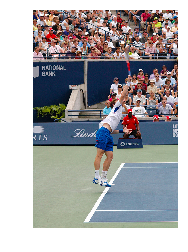

a tennis player hitting a serve on a court
A tennis player jumps and stretches to return the ball.
A man swinging a tennis racquet on a court.
The man is playing a game of tennis on the court.
A man jumping into the air on a tennis court.


In [59]:
im = Image.open(img_fname)
imarr = np.asarray(im)
plt.imshow(imarr)
plt.axis('off')
plt.show()
annids = coco_caps.getAnnIds(imgIds=img_data['id'])
anns = coco_caps.loadAnns(annids)
coco_caps.showAnns(anns)

In [69]:
anns

[{'caption': 'a tennis player hitting a serve on a court',
  'id': 661678,
  'image_id': 79969},
 {'caption': 'A tennis player jumps and stretches to return the ball.',
  'id': 663250,
  'image_id': 79969},
 {'caption': 'A man swinging a tennis racquet on a court.',
  'id': 665353,
  'image_id': 79969},
 {'caption': 'The man is playing a game of tennis on the court.',
  'id': 665908,
  'image_id': 79969},
 {'caption': 'A man jumping into the air on a tennis court.',
  'id': 666412,
  'image_id': 79969}]

In [54]:
a = [torch.ones(25, 100), torch.ones(21, 100), torch.ones(19, 100)]
padded = torch.nn.utils.rnn.pad_sequence(a, batch_first=True)
print(padded.size())
# -> (bs x padded_len x feature)

torch.Size([3, 25, 100])


In [55]:
lengths = [25, 21, 19]
packed = torch.nn.utils.rnn.pack_padded_sequence(padded, lengths, batch_first=True)
print(packed)

PackedSequence(data=tensor([[ 1.,  1.,  1.,  ...,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  ...,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  ...,  1.,  1.,  1.],
        ...,
        [ 1.,  1.,  1.,  ...,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  ...,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  ...,  1.,  1.,  1.]]), batch_sizes=tensor([ 3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
         3,  3,  3,  3,  3,  2,  2,  1,  1,  1,  1]))
